# Project 2: Choose Your Own Ideas

In this project, you will work in teams to make use of skills you learrned in class to come up with an idea based upon data science technology. Your goal is to design a service/solution, and prepare a pitch for your idea.

Your team needs to decide a problem you would like to solve with a specific type of data, then design a data science approach to solve the problem.

This project is much more open ended.

**NOTE**
* Due Date: April 29, 2024, BEFORE 11:59PM EST
* Please download your code (notebook file as an ipynb file) and include it in your submission.
* There are always last minute issues submitting the project. DO NOT WAIT UNTIL THE LAST MINUTE!



# Problem: pick a data science problem that you plan to solve
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the available data and data mining and machine learning solutions.

As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets/domains for further consideration, find out a problem which you believe to be important in the market and design your solution. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve. Why the problem is important to solve? Why you believe you could make a big difference with data science technology.

Please briefly describe in the following cell:

1) The problem you trying to solve:
   Predicting currency exchange rates, specifically from USD to INR, based on historical data. This involves forecasting future    rates using machine learning and time series analysis techniques

2) Why the problem is important to solve?
   Understanding and predicting how currency values will change is extremely valuable for several groups of people
   Businesses involved in international trade: Companies that buy or sell goods and services in different countries need to     
   know how currency values might change to manage costs and set prices effectively.                                                Investors and financial analysts: These professionals need accurate forecasts to make smart investment choices, such as          knowing when to exchange large amounts of money or how to protect their investments against unexpected changes in currency 
   value
   General economic planning: Governments and economic planners need reliable predictions to craft policies that help stabilize 
   their economies against too much fluctuation in currency values.
   Accurately predicting currency values helps these groups make better, informed decisions, which can save money, reduce risk, 
   and increase profits.


3) What is your idea to solve the problem?
   we'll use a Decision Tree regressor to capture non-linear relationships that might be present in the data. Decision Trees are 
   useful for breaking down a complex decision-making process into a simpler form, making it easier to understand how various 
   factors contribute to the outcome. In the context of currency exchange, this means we can better understand how different 
   economic indicators influence rate changes.To capture more subtle patterns and interactions in the data, we'll also use an 
   MLP. This type of neural network is well-suited for finding complex patterns and can adjust its internal parameters to 
   improve accuracy based on the feedback from the model's performance. MLPs can model intricate behaviors in the data that 
   simpler models might miss.We'll be using the Prophet library for its robust handling of time series data. Prophet excels in 
   managing data with trends and seasonal variations, and it can also adjust for holidays and irregular events. This capability 
   makes it ideal for predicting changes in currency exchange rates that might not follow a simple, predictable pattern.



4) What differences you could make with your data science approach?
   Our approach, using advanced data science methods, has several advantages over more traditional ways of predicting currency 
   exchange rates:
   1. Improved accuracy: By using machine learning, specifically the Prophet model, you can potentially achieve more accurate  
   predictions than traditional economic or financial models. These traditional models often rely on simpler statistical methods 
   or theories that may not account for all real-world complexities.
   2. Handling of complex patterns: Your method can better handle complex behaviors in data, like sudden changes in trend or    
   seasonal effects, which traditional models might overlook.
   3. Data-driven decisions: Your approach emphasizes making decisions based on data rather than solely on human intuition or 
   outdated theories. This can lead to more objective and reliable forecasts.
   4. Adaptability: The model can update its predictions based on new data. This means as new exchange rate data becomes  
   available, your model can learn from it and improve its forecasts, which is crucial in the rapidly changing global economy.
   By implementing this project, you could significantly enhance how financial experts, businesses, and policymakers understand 
   and predict changes in currency exchange rates, leading to better financial outcomes and more robust economic strategies.



# Global Currency Forecaster

**Members(Group 8):**
- Jhansi Lakshmi Lakki Reddy
- Sri Sai Sindhu Penmetsa
- Priyanka Valisetti
- Naman Tenguria
- Tarun Narayanam


In [1]:
! pip install prophet

In [27]:
# library import
import requests
import datetime
from io import StringIO
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

# Data Collection:

### Initialization of Date Range and Currency Parameters for Exchange Rate Forecasting

In [28]:
import datetime

# Enter start & end dates
start_date = datetime.date(2023, 5, 29)
end_date = datetime.date(2024, 4, 29)

# Enter source & target currencies
source_currency = "USD"
target_currency = "INR"


### Currency Exchange Data Retrieval Functions

In [29]:
# functions for getting fx data from api
API_URL = "https://marketdata.tradermade.com/api/v1"

def send_api_request(url):
    headers = {'Accept': 'application/json'}
    return requests.get(url=url, headers=headers)

def get_fx_data(source_currency, target_currency, start_date, end_date):
    api_key = "PT2lF7FycJ95Rsey3lnV"
    url = f"{API_URL}/timeseries?currency={source_currency}{target_currency}&api_key={api_key}&start_date={start_date}&end_date={end_date}&format=csv"
    return send_api_request(url).text


def get_currency_df(source_currency, target_currency, start_date, end_date):
    currency_rates = get_fx_data(source_currency, target_currency, start_date, end_date)
    return pd.read_csv(StringIO(currency_rates), sep=",")


currency_df = get_currency_df(source_currency, target_currency, start_date, end_date)
currency_df

date      open      high       low     close
0    2023-05-29  82.53192  82.67659  82.48193  82.55492
1    2023-05-30  82.57508  82.78911  82.49792  82.63591
2    2023-05-31  82.60809  82.74410  82.57092  82.66909
3    2023-06-01  82.65009  82.65209  82.22795  82.25505
4    2023-06-02  82.23595  82.41406  82.22495  82.36893
..          ...       ...       ...       ...       ...
233  2024-04-23  83.34917  83.39417  83.22784  83.23985
234  2024-04-24  83.26816  83.33217  83.23184  83.29084
235  2024-04-25  83.30817  83.39917  83.21284  83.28084
236  2024-04-26  83.23785  83.39317  83.23785  83.36883
237  2024-04-29  83.34517  83.48918  83.31384  83.44918

[238 rows x 5 columns]

# Data Exploration: Exploring the Dataset

### Exploring and  Visual Analysing data of Currency Exchange Rates

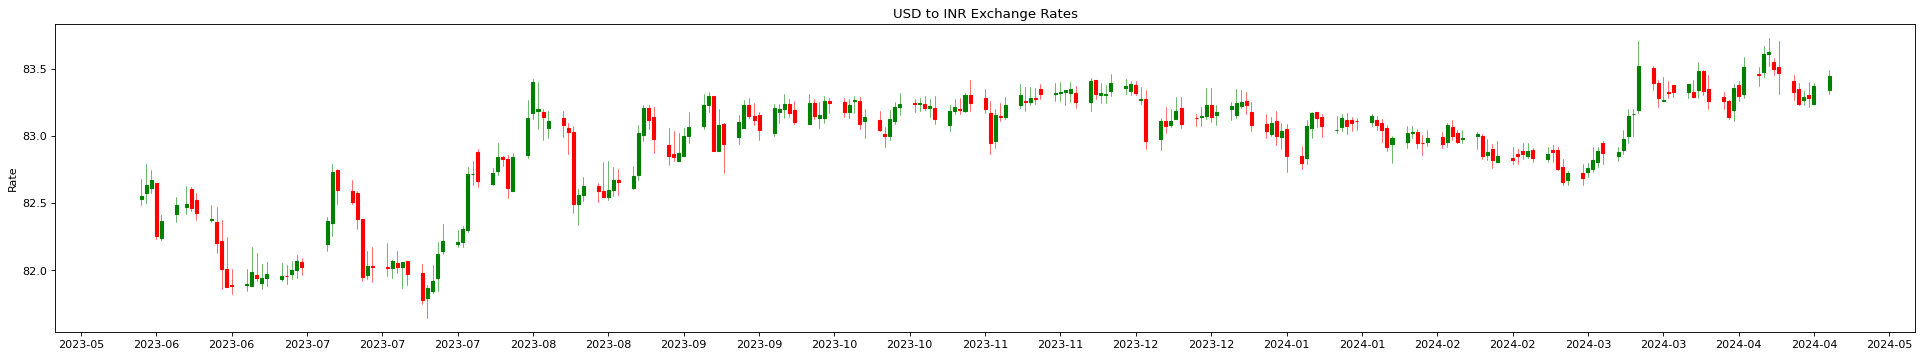

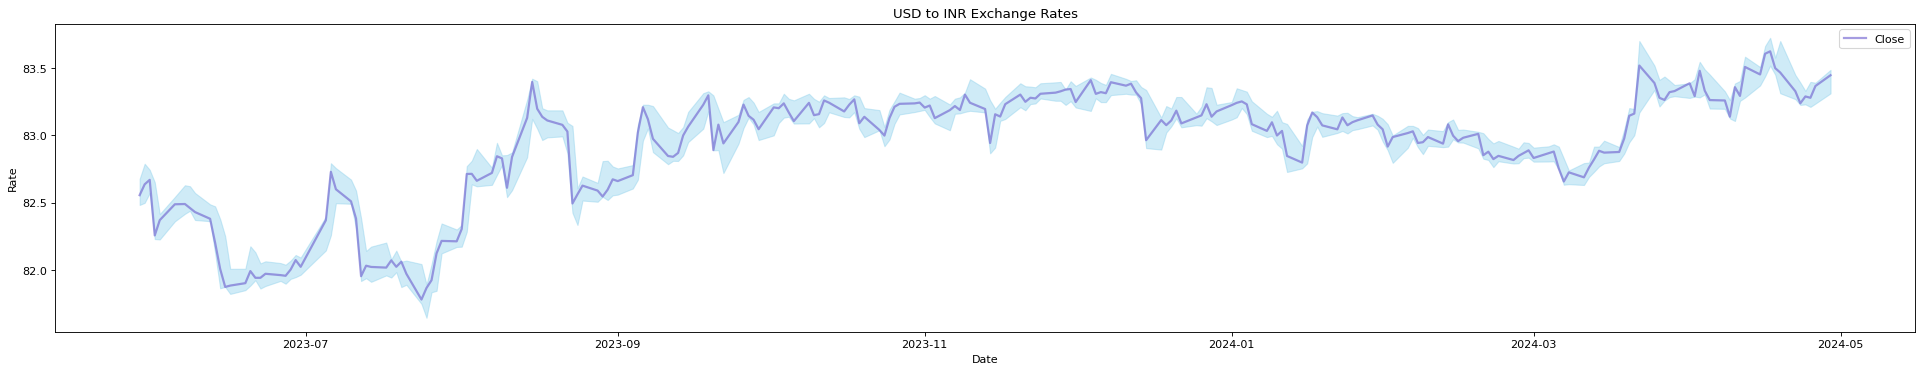

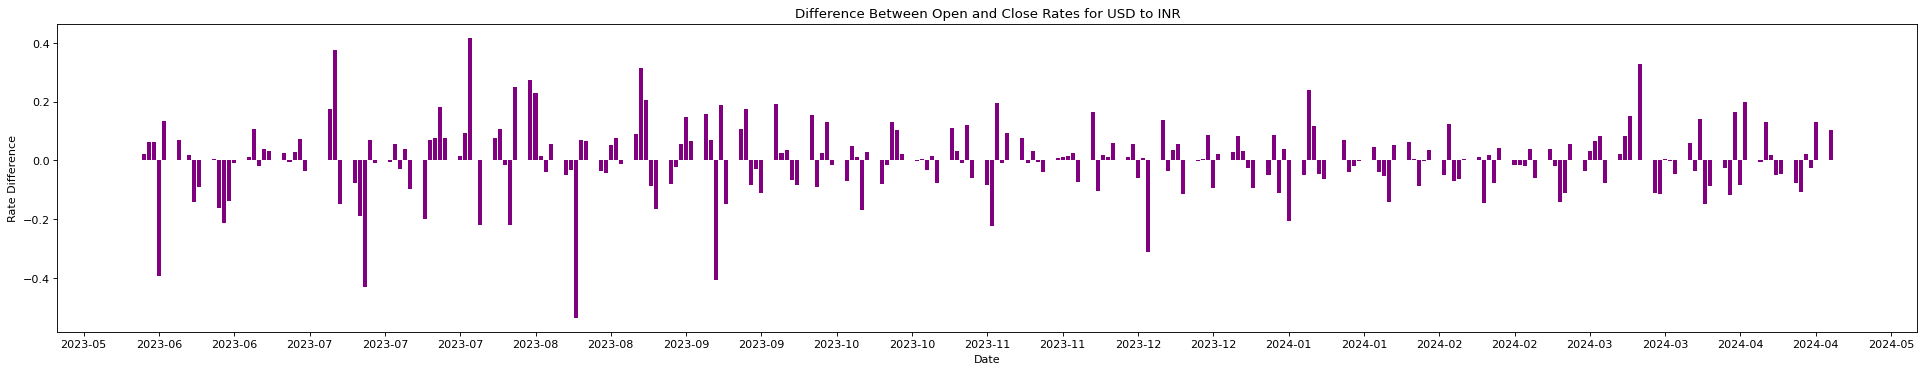

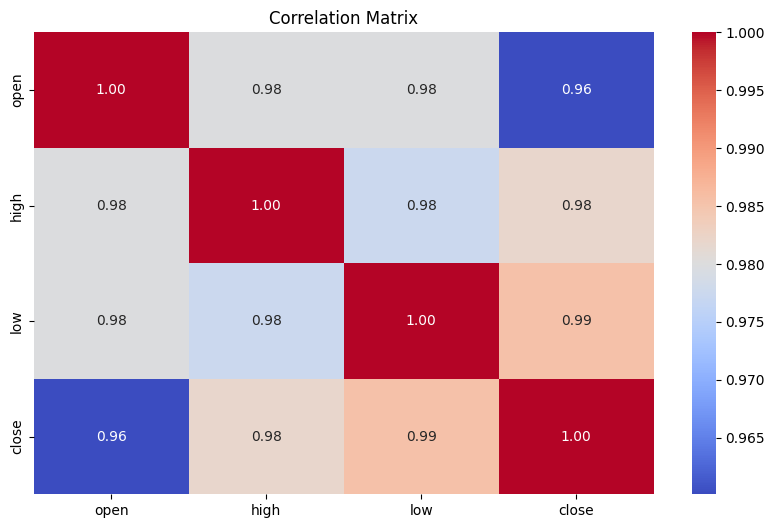

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.ticker as ticker

currency_df['date'] = pd.to_datetime(currency_df['date'])
currency_df["date_num"] = mdates.date2num(currency_df['date'])

fig, ax = plt.subplots(figsize=(30, 5), dpi=80)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
candlestick_ohlc(ax, currency_df[['date_num', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='green', colordown='red')
plt.title(f"{source_currency} to {target_currency} Exchange Rates")
plt.ylabel("Rate")
plt.show()

plt.figure(figsize=(30,5), dpi=80)
plt.fill_between(currency_df['date'], currency_df['low'], currency_df['high'], color="skyblue", alpha=0.4)
plt.plot(currency_df['date'], currency_df['close'], color='Slateblue', alpha=0.6, linewidth=2, label='Close')
plt.title(f"{source_currency} to {target_currency} Exchange Rates")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.legend()
plt.show()


currency_df['difference'] = currency_df['close'] - currency_df['open']
plt.figure(figsize=(30,5), dpi=80)
plt.bar(currency_df['date'], currency_df['difference'], color='purple')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.title(f"Difference Between Open and Close Rates for {source_currency} to {target_currency}")
plt.xlabel("Date")
plt.ylabel("Rate Difference")
plt.show()


import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(currency_df[['open', 'high', 'low', 'close']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [31]:
x = currency_df[["open", "high", "low"]].to_numpy()
y = currency_df["close"].to_numpy().reshape(-1, 1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Data Analysis: you can use different methods to solve the problem you proposed, and find out the best solution.

## 1. Decision Tree Model Evaluation for Currency Exchange Rate Prediction
A Decision Tree Regressor is utilized to predict currency exchange rates using data split into training and testing sets. The model's predictions are evaluated against actual test data, with accuracy measured by the coefficient of determination (R²), Mean Squared Error (MSE), and Mean Absolute Error (MAE). Visualizations include a line graph showing predictions versus actual rates with highlighted differences, and a scatter plot for a direct comparison of predicted and actual values. These analyses and visual tools effectively gauge the model's performance, highlighting strengths and areas for improvement in forecasting currency exchange rates.

In [32]:
dtree_model = DecisionTreeRegressor()
dtree_model.fit(xtrain, ytrain)
dtree_y_pred = dtree_model.predict(xtest)

pred_data_decision_tree = pd.DataFrame(data={"Predicted Rate": dtree_y_pred.flatten()})
print("Score of the Decision Tree Regressor Model: ", dtree_model.score(xtest, ytest)*100)

Score of the Decision Tree Regressor Model:  96.7996828973159


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(ytest, dtree_y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, dtree_y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Squared Error (MSE): 0.0063
Mean Absolute Error (MAE): 0.0539


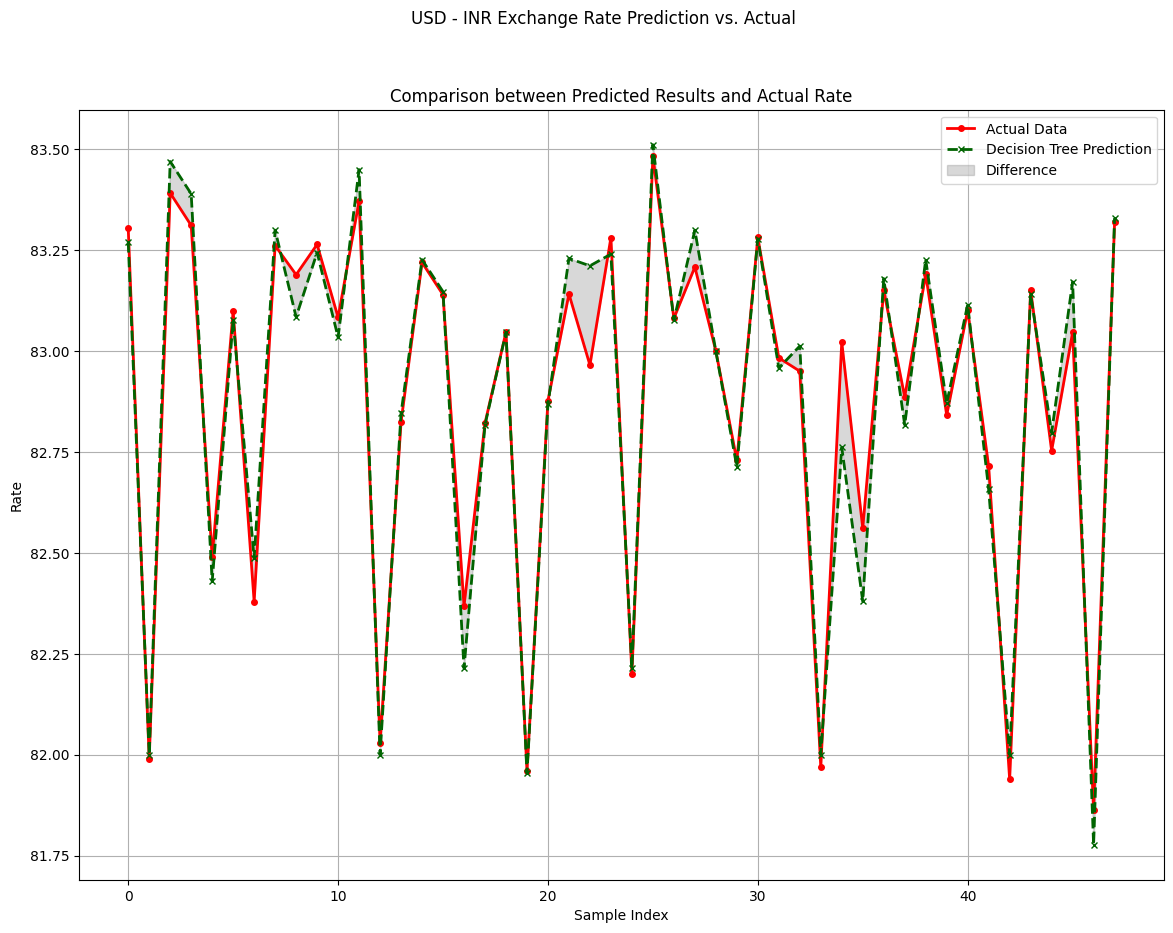

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure that ytest and dtree_y_pred are properly reshaped to be 1-dimensional
ytest_1d = ytest.flatten()  # Flattening ytest to ensure it's 1-dimensional
dtree_y_pred_1d = dtree_y_pred.flatten()  # Flattening dtree_y_pred to ensure it's 1-dimensional

plt.figure(figsize=(14, 10))

# Plot the actual data
plt.plot(ytest_1d, color='Red', linestyle='-', linewidth=2, marker='o', markersize=4, label='Actual Data')

# Plot the predicted data
plt.plot(dtree_y_pred_1d, color='darkgreen', linestyle='--', linewidth=2, marker='x', markersize=4, label='Decision Tree Prediction')

# Highlight differences with a fill
plt.fill_between(range(len(ytest_1d)), dtree_y_pred_1d, ytest_1d, color='gray', alpha=0.3, label='Difference')

plt.suptitle(f"{source_currency} - {target_currency} Exchange Rate Prediction vs. Actual")
plt.title("Comparison between Predicted Results and Actual Rate")
plt.xlabel('Sample Index')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()


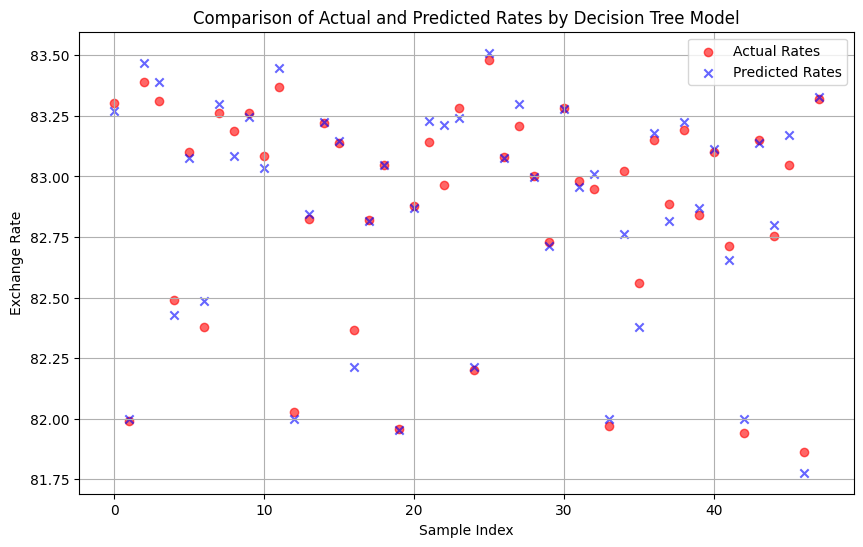

In [35]:
import matplotlib.pyplot as plt

# Assuming ytest and dtree_y_pred are already defined and contain the actual and predicted values, respectively.

plt.figure(figsize=(10, 6))
plt.scatter(range(len(ytest)), ytest, color='red', marker='o', label='Actual Rates', alpha=0.6)
plt.scatter(range(len(dtree_y_pred)), dtree_y_pred, color='blue', marker='x', label='Predicted Rates', alpha=0.6)

plt.title('Comparison of Actual and Predicted Rates by Decision Tree Model')
plt.xlabel('Sample Index')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


## 2.MLP Regressor Evaluation for Forecasting Currency Exchange Rates
The model is trained on a set of historical exchange rate data and then used to predict rates on a test set. Its performance is quantified using metrics such as the R² score, Mean Squared Error (MSE), and Mean Absolute Error (MAE), indicating how closely the predictions match actual data. Visual analysis is conducted through detailed plots: one displaying actual versus predicted rates with markers and lines, and another scatter plot with best-fit lines showing trends and deviations. These visual tools and metrics together assess the effectiveness and accuracy of the MLP model in forecasting currency exchange rates.

In [36]:
mlp_model = MLPRegressor(activation='relu', max_iter = 4000, alpha = 100, hidden_layer_sizes=50, random_state=3,
                   learning_rate_init=0.001, learning_rate='adaptive')

mlp_model.fit(xtrain, ytrain.flatten())
mlp_y_pred = mlp_model.predict(xtest)
print("Score of the MLP Model: ", mlp_model.score(xtest, ytest) * 100)

Score of the MLP Model:  78.35997893606972


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, mlp_y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, mlp_y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Squared Error (MSE): 0.0426
Mean Absolute Error (MAE): 0.1956


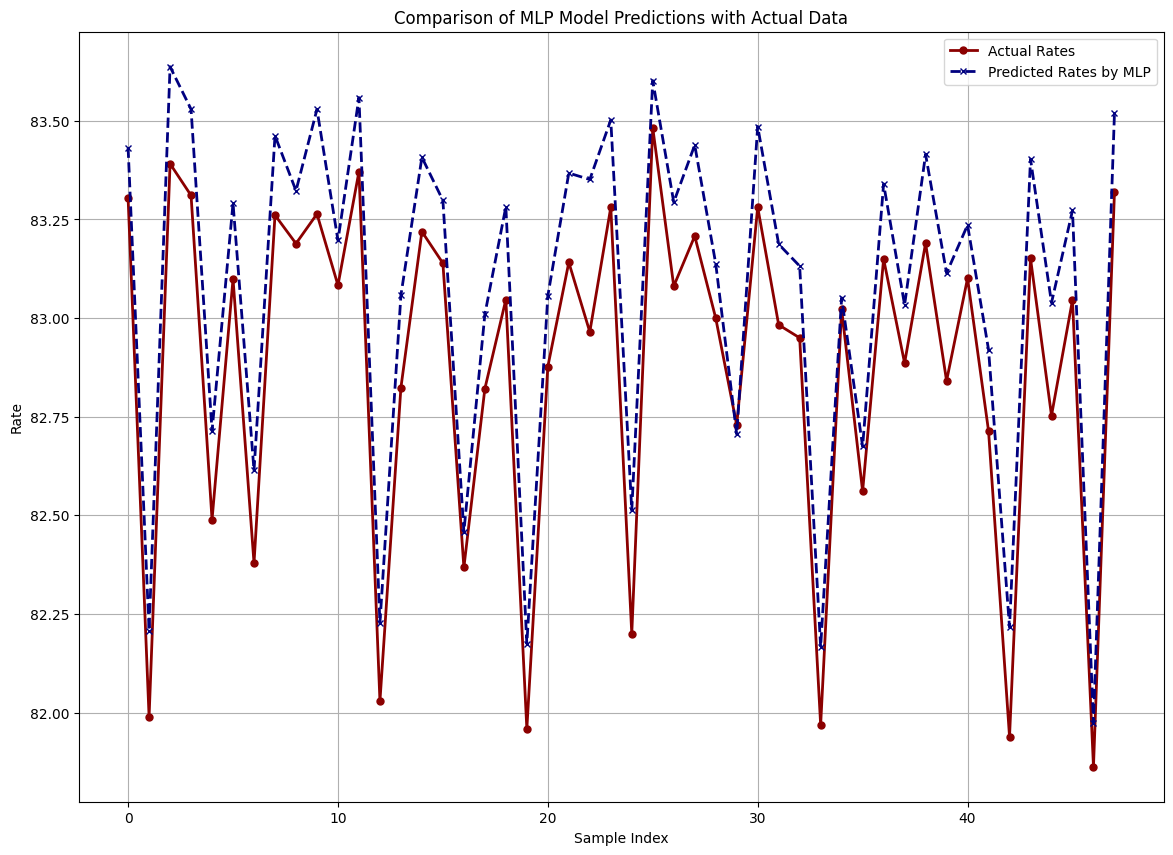

In [38]:
import matplotlib.pyplot as plt

# Assuming ytest and mlp_y_pred are already defined and contain the actual and predicted values, respectively.

plt.figure(figsize=(14, 10))

# Plot actual data
plt.plot(ytest, color='darkred', marker='o', linestyle='-', linewidth=2, markersize=5, label='Actual Rates')

# Plot predicted data
plt.plot(mlp_y_pred, color='navy', marker='x', linestyle='--', linewidth=2, markersize=5, label='Predicted Rates by MLP')

plt.title(f"Comparison of MLP Model Predictions with Actual Data")
plt.xlabel('Sample Index')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()


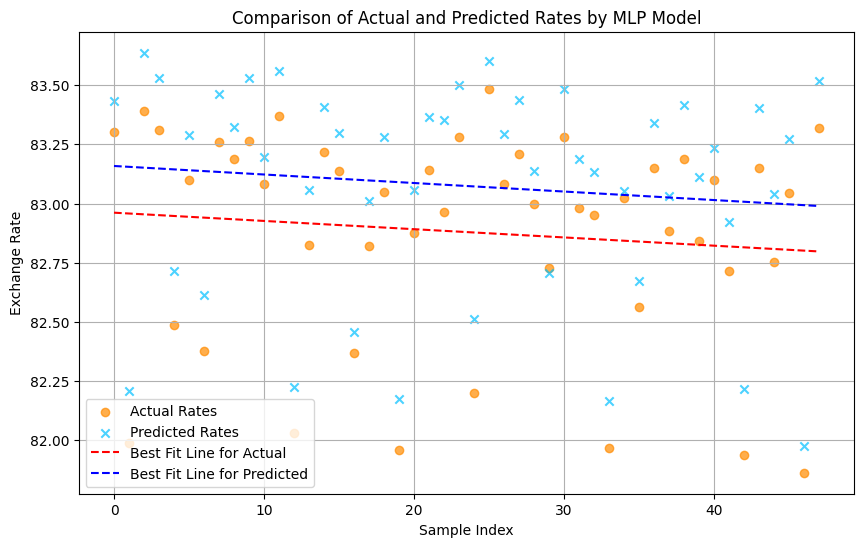

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure that ytest and mlp_y_pred are properly reshaped to be 1-dimensional
ytest_1d = ytest.flatten()  # Flattening ytest to ensure it's 1-dimensional
mlp_y_pred_1d = mlp_y_pred.flatten()  # Flattening mlp_y_pred to ensure it's 1-dimensional

plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted
plt.scatter(range(len(ytest_1d)), ytest_1d, color='darkorange', marker='o', label='Actual Rates', alpha=0.7)
plt.scatter(range(len(mlp_y_pred_1d)), mlp_y_pred_1d, color='deepskyblue', marker='x', label='Predicted Rates', alpha=0.7)

# Calculate a best-fit line for each set to emphasize the trend
# Fitting for actual rates
fit_actual = np.polyfit(range(len(ytest_1d)), ytest_1d, 1)
fit_pred = np.polyfit(range(len(mlp_y_pred_1d)), mlp_y_pred_1d, 1)

# Generate values from fits
fit_actual_vals = np.poly1d(fit_actual)(range(len(ytest_1d)))
fit_pred_vals = np.poly1d(fit_pred)(range(len(mlp_y_pred_1d)))

# Plot best-fit line
plt.plot(range(len(ytest_1d)), fit_actual_vals, 'r--', label='Best Fit Line for Actual')
plt.plot(range(len(mlp_y_pred_1d)), fit_pred_vals, 'b--', label='Best Fit Line for Predicted')

plt.title('Comparison of Actual and Predicted Rates by MLP Model')
plt.xlabel('Sample Index')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


## Implementation and Visualization of Exchange Rate Forecasting Using Prophet
In this model, currency exchange rate data are formatted and utilized to train a Prophet model, which identifies key trends and seasonal components to predict future rates. The model extends the forecast by 90 days, incorporating visualization tools such as Plotly and Matplotlib to depict actual data, predicted values, and weekly seasonality. Significant changes in trends, detected as changepoints, are highlighted to assess their impact on the forecast. Confidence intervals are also visualized to depict potential forecast variability. The combined analysis provides a comprehensive review of the model's performance and strategic forecasting insights.

In [40]:
# Prophet model requires a timeseries field (ds) and target(y) to forecast,
# hence we extract date & close rates from currency dataframe
prophet_dataset = pd.DataFrame()
prophet_dataset['ds'] = pd.to_datetime(currency_df["date"])
prophet_dataset['y'] = pd.to_numeric(currency_df['close'])
prophet_dataset

ds         y
0   2023-05-29  82.55492
1   2023-05-30  82.63591
2   2023-05-31  82.66909
3   2023-06-01  82.25505
4   2023-06-02  82.36893
..         ...       ...
233 2024-04-23  83.23985
234 2024-04-24  83.29084
235 2024-04-25  83.28084
236 2024-04-26  83.36883
237 2024-04-29  83.44918

[238 rows x 2 columns]

In [50]:
# Fitting date and close rates in prophet model
prophet_basic = Prophet()
prophet_basic.fit(prophet_dataset)

# create timeseries dataframe including future dates
future_df = prophet_basic.make_future_dataframe(periods=90)
future_df

21:29:56 - cmdstanpy - INFO - Chain [1] start processing
21:29:56 - cmdstanpy - INFO - Chain [1] done processing


ds
0   2023-05-29
1   2023-05-30
2   2023-05-31
3   2023-06-01
4   2023-06-02
..         ...
323 2024-07-24
324 2024-07-25
325 2024-07-26
326 2024-07-27
327 2024-07-28

[328 rows x 1 columns]

In [51]:
import plotly.graph_objects as go

# Assuming 'forecast' contains the output from Prophet and includes columns like 'ds' for dates and 'yhat' for predictions
# 'prophet_dataset' contains historical data up to the present
forecast = prophet_basic.predict(future_df)
# Create traces for the actual historical data and the forecasted data
trace1 = go.Scatter(
    x=prophet_dataset['ds'],
    y=prophet_dataset['y'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
)

trace2 = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Forecast',
    line=dict(color='red')
)

trace3 = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    fill=None,
    mode='lines',
    line=dict(color='gray'),
    showlegend=False
)

trace4 = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    fill='tonexty',  # fill area between trace3 and trace4
    mode='lines',
    line=dict(color='gray'),
    showlegend=False
)

# Combining all traces into one plot
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title=f"{source_currency} to {target_currency} Exchange Rate Forecast",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Exchange Rate'),
    hovermode='closest'
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [169]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [170]:
print(prophet_dataset.head())
print(forecast.head())


          ds         y
0 2023-05-29  82.55492
1 2023-05-30  82.63591
2 2023-05-31  82.66909
3 2023-06-01  82.25505
4 2023-06-02  82.36893
          ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2024-02-22  82.807646   82.784618   82.936178    82.807646    82.807646   
1 2024-02-23  82.807827   82.800297   82.959064    82.807371    82.808434   
2 2024-02-26  82.808372   82.788795   82.947038    82.806107    82.810763   
3 2024-02-27  82.808554   82.787488   82.946987    82.803711    82.813502   
4 2024-02-28  82.808735   82.800599   82.960058    82.799738    82.816284   

   additive_terms  additive_terms_lower  additive_terms_upper   average  ...  \
0        0.051122              0.051122              0.051122 -0.024043  ...   
1        0.071739              0.071739              0.071739  0.006817  ...   
2        0.056514              0.056514              0.056514 -0.022799  ...   
3        0.054988              0.054988              0.054988 -0.029270  ...   

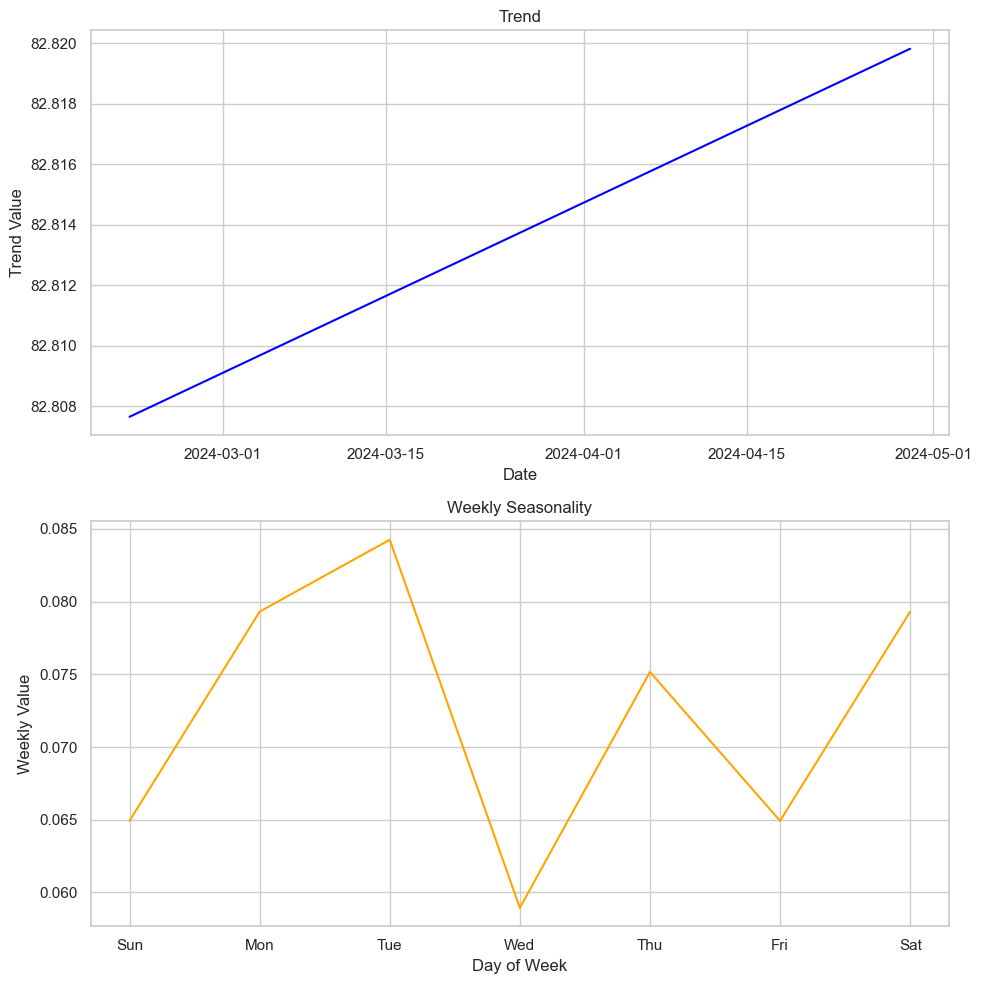

In [192]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'forecast' contains your Prophet forecast including the 'weekly' component if available
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), squeeze=False)

# Plot trend
axes[0, 0].plot(forecast['ds'], forecast['trend'], label='Trend', color='blue')
axes[0, 0].set_title('Trend')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Trend Value')

# Check if 'weekly' exists and plot
if 'weekly' in forecast.columns:
    weekly = forecast['weekly'].iloc[-7:]  # Make sure to select only the last 7 data points which correspond to a full week
    days = np.array(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    axes[1, 0].plot(days, weekly, label='Weekly', color='orange')
    axes[1, 0].set_title('Weekly Seasonality')
    axes[1, 0].set_xlabel('Day of Week')
    axes[1, 0].set_ylabel('Weekly Value')
else:
    axes[1, 0].set_visible(False)  # Hide the subplot if no weekly data

plt.tight_layout()
plt.show()


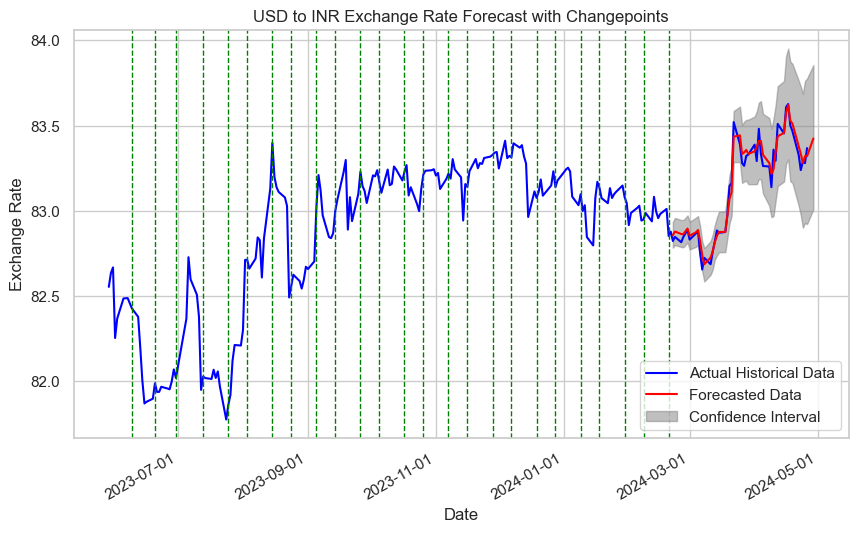

In [196]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'forecast' and 'prophet_dataset' are your datasets
historical_dates = prophet_dataset['ds']
historical_values = prophet_dataset['y']
forecast_dates = forecast['ds']
forecast_values = forecast['yhat']
changepoints = prophet_basic.changepoints

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the historical data
ax.plot(historical_dates, historical_values, label='Actual Historical Data', color='blue')

# Plot the forecasted data
ax.plot(forecast_dates, forecast_values, label='Forecasted Data', color='red')

# Highlight changepoints
for cp in changepoints:
    plt.axvline(x=cp, color='green', linestyle='--', lw=1)

# Highlight confidence intervals
ax.fill_between(forecast_dates, forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.5, label='Confidence Interval')

# Improve the date formatting on x-axis
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()  # Rotate date labels for better readability

# Set titles and labels
plt.title(f"{source_currency} to {target_currency} Exchange Rate Forecast with Changepoints")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()

# Show the plot
plt.show()


In [132]:
pd.DataFrame(prophet_basic.changepoints)

ds
8   2023-06-09
15  2023-06-20
23  2023-06-30
30  2023-07-13
38  2023-07-25
45  2023-08-03
53  2023-08-15
60  2023-08-24
68  2023-09-05
76  2023-09-15
83  2023-09-26
91  2023-10-06
98  2023-10-17
106 2023-10-27
113 2023-11-07
121 2023-11-17
129 2023-11-29
136 2023-12-08
144 2023-12-20
151 2023-12-29
159 2024-01-10
166 2024-01-19
174 2024-01-31
181 2024-02-09
189 2024-02-21

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


It focuses on forecasting currency exchange rates using various models like Prophet, Decision Tree, and MLP (Multilayer Perceptron). Initially, it sets up Prophet models with custom settings such as changepoints and additional regressors, and it extends to creating predictions for future dates. The results are visualized using matplotlib and Plotly, highlighting trends, changepoints, and seasonality effects. The model's performance is evaluated through metrics like R² score, Mean Squared Error (MSE), and Mean Absolute Error (MAE), and these metrics are visualized in comparison plots to illustrate the effectiveness of each modeling approach in predicting exchange rates.

18:39:16 - cmdstanpy - INFO - Chain [1] start processing
18:39:16 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\JHANSI LAKSHMI . L\anaconda3\envs\jhansi\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\JHANSI LAKSHMI . L\anaconda3\envs\jhansi\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



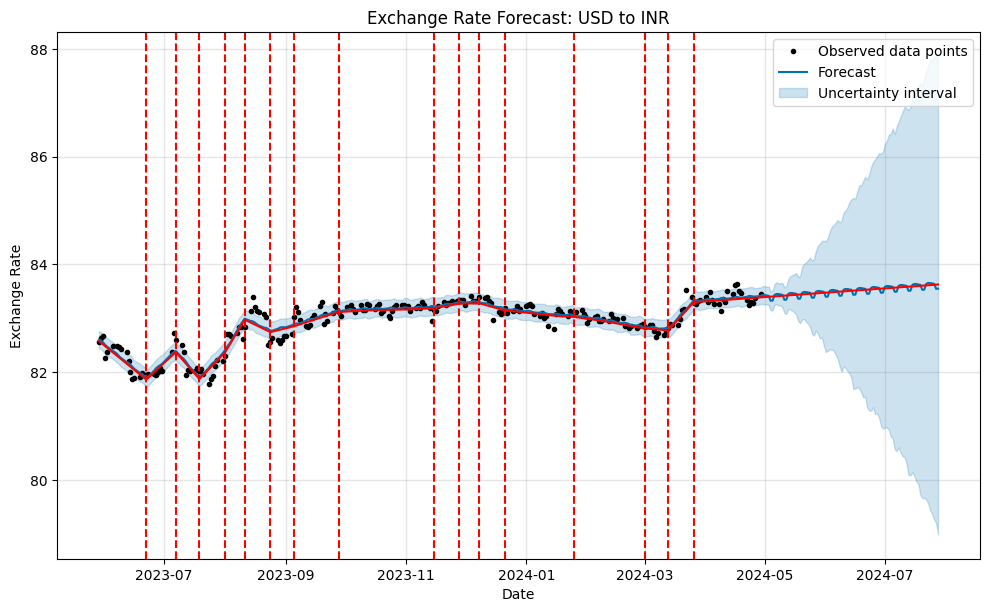

In [133]:
# Initialize the Prophet model with an adjusted changepoint range
prophet_model_with_changepoints = Prophet(changepoint_range=0.9)
# Fit the model on the dataset and predict future values
predicted_forecast = prophet_model_with_changepoints.fit(prophet_dataset).predict(future_df)
# Create a plot to visualize the forecast
forecast_figure = prophet_model_with_changepoints.plot(predicted_forecast)
# Add changepoint markers to the plot
add_changepoints_to_plot(forecast_figure.gca(), prophet_model_with_changepoints, predicted_forecast)
# Set plot titles and labels
plt.title(f"Exchange Rate Forecast: {source_currency} to {target_currency}")
plt.legend(loc='best')
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.show()


18:39:20 - cmdstanpy - INFO - Chain [1] start processing
18:39:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\JHANSI LAKSHMI . L\anaconda3\envs\jhansi\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\JHANSI LAKSHMI . L\anaconda3\envs\jhansi\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



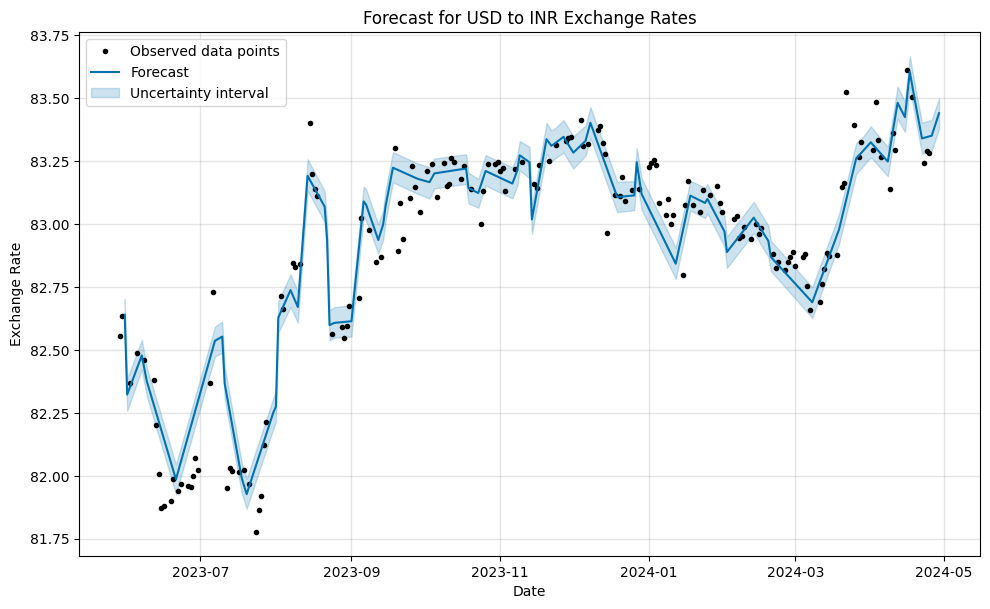

In [134]:
# Creating a new DataFrame to include necessary features for regression analysis
exchange_rate_df = pd.DataFrame()
exchange_rate_df['ds'] = currency_df['date']
exchange_rate_df['y'] = currency_df['close']
exchange_rate_df['opening_price'] = currency_df['open']
exchange_rate_df['peak_price'] = currency_df['high']
exchange_rate_df['lowest_price'] = currency_df['low']

# Splitting the dataset into training and testing subsets
training_set, testing_set = train_test_split(exchange_rate_df, test_size=0.3)

# Setting up the Prophet model and adding multiple regressors
prophet_with_regressors = Prophet()
prophet_with_regressors.add_regressor('opening_price')
prophet_with_regressors.add_regressor('peak_price')
prophet_with_regressors.add_regressor('lowest_price')

# Training the model on the training set
prophet_with_regressors.fit(training_set)
# Generating future dates for prediction
future_dates = prophet_with_regressors.make_future_dataframe(periods=90)

# Predicting exchange rates for the testing set
predicted_rates = prophet_with_regressors.predict(testing_set)
# Plotting the forecast results
plot = prophet_with_regressors.plot(predicted_rates, uncertainty=True)
plt.title(f"Forecast for {source_currency} to {target_currency} Exchange Rates")
plt.legend(loc='best')
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.show()


In [135]:
days = 10
future_range = pd.date_range(end_date, periods=days, freq='D')
future_df = pd.DataFrame({ 'ds': future_range})

def find_estimate_range(df, feature):
    first = currency_df[-10:][feature].median()
    second = currency_df[-60:][feature].median()
    if first < second:
        return first, second
    else:
        return second, first


for feature in ['open', 'high', 'low']:
    start_estimate_range, end_estimate_range = find_estimate_range(currency_df, feature)
    for i in range (0, days):
        future_df.at[i, feature] = random.uniform(start_estimate_range, end_estimate_range)

future_df

ds       open       high        low
0 2024-04-29  83.082972  83.385348  83.016015
1 2024-04-30  83.084791  83.318648  83.023083
2 2024-05-01  83.167708  83.177478  83.220126
3 2024-05-02  83.294046  83.401903  83.260074
4 2024-05-03  83.211436  83.346788  83.065676
5 2024-05-04  83.103633  83.220192  83.117064
6 2024-05-05  83.354737  83.157527  82.996372
7 2024-05-06  83.296952  83.314870  83.056662
8 2024-05-07  83.069043  83.390899  83.158202
9 2024-05-08  83.296168  83.372840  83.074320

18:39:34 - cmdstanpy - INFO - Chain [1] start processing
18:39:34 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\JHANSI LAKSHMI . L\anaconda3\envs\jhansi\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\JHANSI LAKSHMI . L\anaconda3\envs\jhansi\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



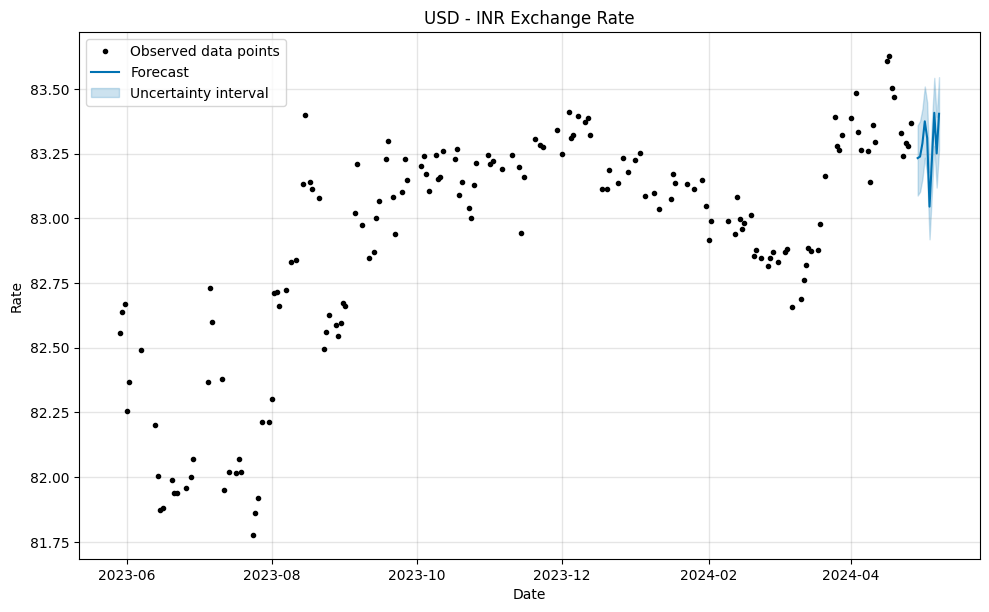

In [137]:
new_df = pd.DataFrame()
new_df['ds'] = pd.to_datetime(currency_df["date"])
new_df['y'] = pd.to_numeric(currency_df['close'])
new_df['open'] = pd.to_numeric(currency_df['open'])
new_df['high'] = pd.to_numeric(currency_df['high'])
new_df['low'] = pd.to_numeric(currency_df['low'])


m = Prophet()
m.add_regressor('open')
m.fit(new_df)
forecast = m.predict(future_df)
pro_regressor.plot(forecast, uncertainty=True, include_legend=True)
plt.title(f"{source_currency} - {target_currency} Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.show()


18:44:27 - cmdstanpy - INFO - Chain [1] start processing
18:44:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\JHANSI LAKSHMI . L\anaconda3\envs\jhansi\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\JHANSI LAKSHMI . L\anaconda3\envs\jhansi\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



R-squared (R2) Score: 96.81%
Mean Squared Error (MSE): 0.0025
Mean Absolute Error (MAE): 0.0406


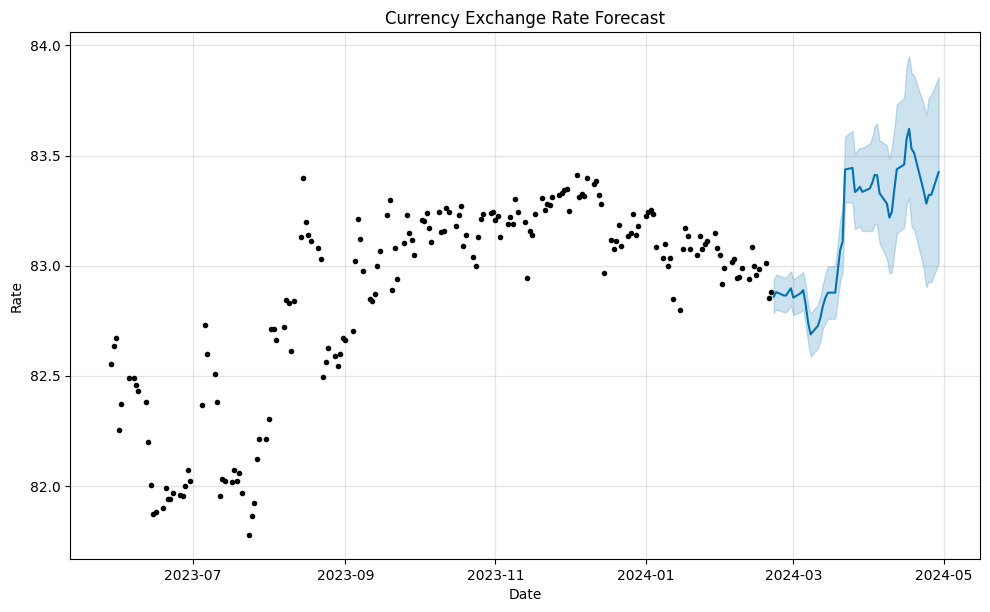

In [142]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming 'currency_df' contains the necessary data with columns 'date', 'close', 'low', and 'high'
currency_df['average'] = (currency_df['low'] + currency_df['high']) / 2

# Prepare the DataFrame for Prophet
prophet_dataset = pd.DataFrame({
    'ds': pd.to_datetime(currency_df['date']),
    'y': pd.to_numeric(currency_df['close']),
    'average': currency_df['average']  # Additional regressor
})

# Split the data into training and test sets
train_size = int(0.8 * len(prophet_dataset))
train_data = prophet_dataset[:train_size]
test_data = prophet_dataset[train_size:]

# Initialize and fit the Prophet model with the additional regressor
prophet_model = Prophet()
prophet_model.add_regressor('average')
prophet_model.fit(train_data)

# Make predictions for the test set
forecast = prophet_model.predict(test_data.drop(columns='y'))

# Extract actual and predicted values for accuracy calculation
actual = test_data['y']
predicted = forecast['yhat']

# Calculate accuracy metrics
r2 = r2_score(actual, predicted)
r2_percentage = r2 * 100  # Convert R2 score to percentage
mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

# Print the results
print(f"R-squared (R2) Score: {r2_percentage:.2f}%")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Visualize the forecast
fig = prophet_model.plot(forecast)
plt.title("Currency Exchange Rate Forecast")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.grid(True)
plt.show()


In [144]:
import pandas as pd

# Summary of metrics for both models
summary_df = pd.DataFrame({
    "Model": ["Decision Tree", "MLP Regressor", "Prophet"],
    "R² Score (%)": [
        dtree_model.score(xtest, ytest) * 100,  # R² score for Decision Tree
        mlp_model.score(xtest, ytest) * 100,    # R² score for MLP
        r2_score(actual, predicted) * 100       # R² score for Prophet 
    ],
    "MSE": [
        mean_squared_error(ytest, dtree_y_pred),  # MSE for Decision Tree
        mean_squared_error(ytest, mlp_y_pred),    # MSE for MLP
        mean_squared_error(actual, predicted)     # MSE for Prophet
    ],
    "MAE": [
        mean_absolute_error(ytest, dtree_y_pred),  # MAE for Decision Tree
        mean_absolute_error(ytest, mlp_y_pred),    # MAE for MLP
        mean_absolute_error(actual, predicted)     # MAE for Prophet
    ]
})

print(summary_df)


           Model  R² Score (%)       MSE       MAE
0  Decision Tree     96.969612  0.005963  0.050775
1  MLP Regressor     78.341767  0.042617  0.195643
2        Prophet     96.809229  0.002528  0.040632


C:\Users\JHANSI LAKSHMI . L\AppData\Local\Temp\ipykernel_16288\2808383188.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




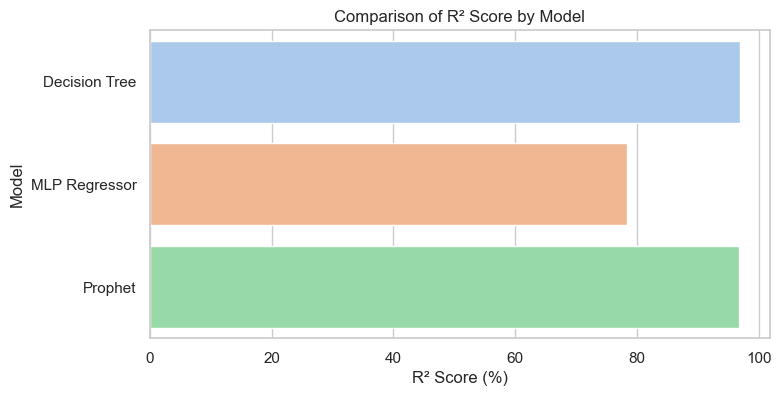

In [146]:
# Plot R² Score
plt.figure(figsize=(8, 4))
sns.barplot(x='R² Score (%)', y='Model', data=summary_df, palette="pastel")
plt.title('Comparison of R² Score by Model')
plt.xlabel('R² Score (%)')
plt.ylabel('Model')
plt.show()


C:\Users\JHANSI LAKSHMI . L\AppData\Local\Temp\ipykernel_16288\3463129308.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




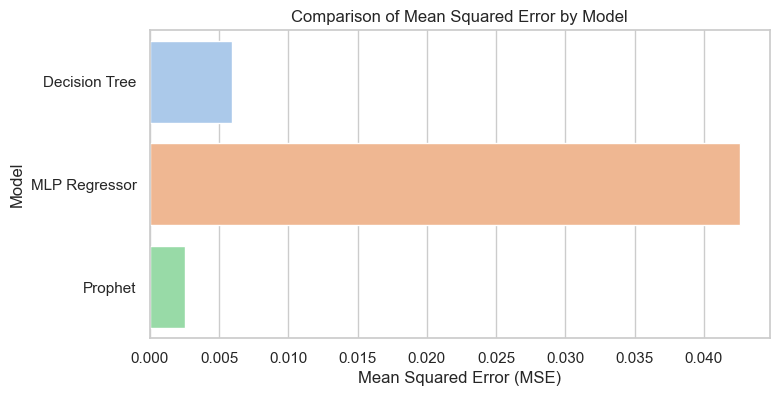

In [147]:
# Plot MSE
plt.figure(figsize=(8, 4))
sns.barplot(x='MSE', y='Model', data=summary_df, palette="pastel")
plt.title('Comparison of Mean Squared Error by Model')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Model')
plt.show()


C:\Users\JHANSI LAKSHMI . L\AppData\Local\Temp\ipykernel_16288\3671712771.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




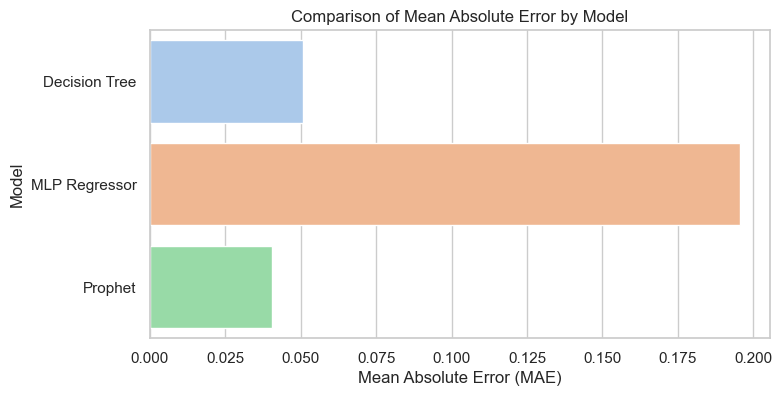

In [148]:
# Plot MAE
plt.figure(figsize=(8, 4))
sns.barplot(x='MAE', y='Model', data=summary_df, palette="pastel")
plt.title('Comparison of Mean Absolute Error by Model')
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Model')
plt.show()


# Conclusion

1. **Data Acquisition**: Utilizing API requests to fetch historical foreign exchange data for the USD to INR currency pair, covering a specified date range.

2. **Data Preparation**: Converting the fetched data into a structured format suitable for analysis and visualizing it to identify trends and patterns.

3. **Model Training**: Implementing and training several machine learning models, including a Decision Tree, MLP Regressor, and Prophet model, on the historical exchange rate data.

4. **Model Evaluation**: Assessing the performance of each model using metrics like R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE) to determine their accuracy and reliability.

5. **Results Visualization**: Displaying the performance results of each model in comparative visual formats, such as bar plots, to facilitate an easy evaluation of their predictive capabilities.

# References
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
- https://towardsdatascience.com/time-series-forecasting-with-prophet-54f2ac5e722e
- https://matplotlib.org/stable/gallery/style_sheets/mplstyle_sheet.html
- https://scikit-learn.org/stable/modules/model_evaluation.html



# Done

All set!

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PDF Report**: please prepare a final report in the PDF form which should be at least 5 pages. The report should includes:

  * What is you motivation?

  * What data you collected?

  * How does this data support your product idea?

  * How did you analyse the data?

  * What did you find in the data?

  * (please include figures or tables in the report, but no source code)
  
* **PPT Slides**: please prepare PPT slides to present about the project. Each team present their case studies in class for 10 minutes. **Story-telling** is important, the slides should include:

  1. Motivation about the data collection, why the topic is interesting to you.

  2. Communicating Results (figure/table)

  3. Story telling (How all the parts (data, analysis, result) fit together as a story?)

Please compress all the files in a zipped file.

        
**Note: Each team only needs to submit one submission**